In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import pandas_datareader as web

In [13]:
df = web.DataReader('aapl', 'yahoo', '2018-01-01', '2021-01-01')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2018-01-02 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       756 non-null    float64
 1   Low        756 non-null    float64
 2   Open       756 non-null    float64
 3   Close      756 non-null    float64
 4   Volume     756 non-null    float64
 5   Adj Close  756 non-null    float64
dtypes: float64(6)
memory usage: 41.3 KB


<AxesSubplot:xlabel='Date'>

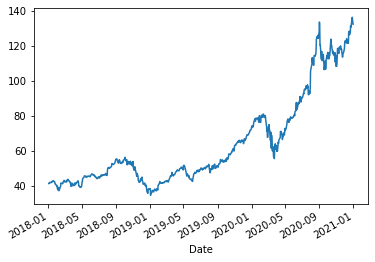

In [15]:
df['Adj Close'].plot()

In [16]:
stock_cycle, stock_trend = sm.tsa.filters.hpfilter(df['Adj Close'])

In [17]:
stock_cycle

Date
2018-01-02   -0.829325
2018-01-03   -0.800461
2018-01-04   -0.571688
2018-01-05   -0.060327
2018-01-08   -0.175436
                ...   
2020-12-24    0.364513
2020-12-28    4.301373
2020-12-29    1.710926
2020-12-30   -0.207877
2020-12-31   -2.005600
Name: Adj Close_cycle, Length: 756, dtype: float64

In [18]:
stock_trend 

Date
2018-01-02     42.209562
2018-01-03     42.173492
2018-01-04     42.136904
2018-01-05     42.098779
2018-01-08     42.057741
                 ...    
2020-12-24    131.408574
2020-12-28    132.184680
2020-12-29    132.957836
2020-12-30    133.728355
2020-12-31    134.497620
Name: Adj Close_trend, Length: 756, dtype: float64

In [19]:
df["trend"] = stock_trend

<AxesSubplot:xlabel='Date'>

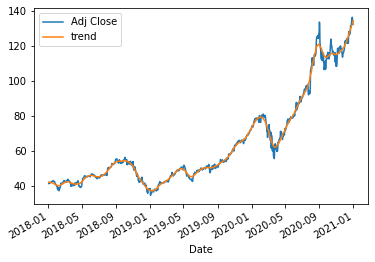

In [20]:
df[['Adj Close', 'trend']].plot()

<AxesSubplot:xlabel='Date'>

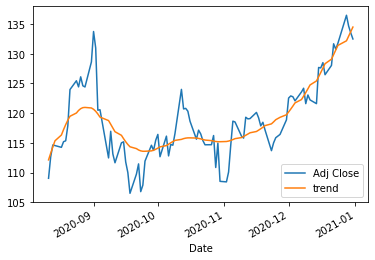

In [25]:
df[['Adj Close', 'trend']].iloc[-100:].plot()

In [21]:
df['cycle'] = stock_cycle

<AxesSubplot:xlabel='Date'>

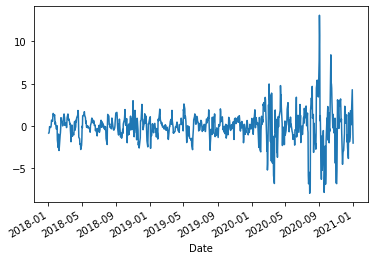

In [22]:
df['cycle'].plot()